In [18]:
# ===== 0. Импорты и настройка =====
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.decomposition import PCA
import json

In [48]:
sns.set(style="whitegrid")
%matplotlib inline

os.makedirs("artifacts/figures", exist_ok=True)
os.makedirs("artifacts/labels", exist_ok=True)

# ===== 1. Загрузка данных =====
datasets = {
    "ds1": "data/S07-hw-dataset-01.csv",
    "ds2": "data/S07-hw-dataset-02.csv",
    "ds4": "data/S07-hw-dataset-04.csv"
}
dfs = {name: pd.read_csv(path) for name, path in datasets.items()}

for name, df in dfs.items():
    print(f"===== {name} =====")
    display(df.head())
    display(df.info())
    display(df.describe())
    display(df.isna().sum())

===== ds1 =====


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


None

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64

===== ds2 =====


,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


None

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64

===== ds4 =====


,sample_id,cat_a,cat_b,n01,n02,n03,n04,n05,n06,n07,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
0,0,B,X,-4.827501,-24.507466,-7.852963,0.771781,28.297884,-4.493911,-42.769449,...,24.597176,-26.354320,4.543397,-19.549036,-3.051332,-5.538587,-3.084457,5.499629,-6.128896,3.132067
1,1,F,V,51.302500,NaN,5.534737,51.305464,-8.027553,28.297548,NaN,...,-18.216260,8.527932,17.202115,-30.452260,0.855326,1.199066,3.597555,-2.239703,2.932710,0.473145
2,2,A,W,-4.820828,-2.625385,27.891578,1.523041,-5.776687,-16.298523,2.462937,...,-48.260775,9.313232,12.323411,55.081325,-3.945606,-0.280540,-0.130583,-7.353205,-2.942836,1.460477
3,3,B,X,-2.627573,-25.063639,-9.450011,-8.344669,22.371118,-11.525848,-43.762607,...,24.700663,-25.466915,-3.398665,-18.174541,0.438229,3.152556,3.859283,-2.678769,-2.213923,-4.724639
4,4,C,Y,-11.415710,-8.692169,48.636163,14.661826,-39.634618,10.769075,40.187536,...,-79.710383,-13.694253,41.575892,-9.498640,1.529608,-1.641347,3.500090,3.111257,1.475232,-1.321676


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  10000 non-null  int64  
 1   cat_a      10000 non-null  object 
 2   cat_b      10000 non-null  object 
 3   n01        9826 non-null   float64
 4   n02        9811 non-null   float64
 5   n03        9801 non-null   float64
 6   n04        9808 non-null   float64
 7   n05        9799 non-null   float64
 8   n06        9817 non-null   float64
 9   n07        9796 non-null   float64
 10  n08        9806 non-null   float64
 11  n09        9805 non-null   float64
 12  n10        9811 non-null   float64
 13  n11        9796 non-null   float64
 14  n12        9798 non-null   float64
 15  n13        9803 non-null   float64
 16  n14        9802 non-null   float64
 17  n15        9814 non-null   float64
 18  n16        9809 non-null   float64
 19  n17        9788 non-null   float64
 20  n18    

None

,sample_id,n01,n02,n03,n04,n05,n06,n07,n08,n09,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
count,10000.00000,9826.000000,9811.000000,9801.000000,9808.000000,9799.000000,9817.000000,9796.000000,9806.000000,9805.000000,...,9785.000000,9804.000000,9829.000000,9793.000000,9815.000000,9776.000000,9803.000000,9789.000000,9798.000000,9805.000000
mean,4999.50000,17.348435,-2.057620,7.908302,14.269157,0.900590,5.832787,-0.840875,-4.888128,3.184200,...,-12.716502,-0.506241,8.360226,0.026943,0.039297,-0.037155,0.028512,-0.030738,-0.018685,-0.030254
std,2886.89568,22.578551,19.043410,25.637807,18.815319,20.981294,13.221646,26.583849,15.466271,32.208740,...,37.290305,14.336833,17.754646,26.121335,3.009995,3.020813,3.028106,3.000090,3.014209,3.014573
min,0.00000,-22.437090,-37.546998,-38.136412,-23.374316,-45.914070,-20.650038,-60.297304,-44.464550,-70.904880,...,-89.640783,-35.102360,-25.014050,-49.423300,-11.225848,-14.446922,-10.840777,-11.679259,-11.437909,-11.491223
25%,2499.75000,-3.975438,-14.200552,-8.591513,-1.223379,-5.086756,-4.532057,-13.554720,-17.352641,-11.460490,...,-41.284671,-11.563652,-2.123576,-19.425213,-1.973213,-2.082235,-2.007628,-2.074500,-2.051778,-2.074396
50%,4999.50000,22.042807,-6.532183,0.350400,10.069142,2.413111,7.391953,-2.429024,-7.095546,13.258691,...,-1.145681,2.491416,6.691365,-8.464171,0.037806,-0.033336,0.031588,-0.043127,-0.015441,-0.015903
75%,7499.25000,37.535647,2.092197,30.725630,29.807101,18.398883,13.033076,16.095731,3.909111,20.188426,...,18.916379,11.903004,14.939690,16.861978,2.048648,2.019027,2.056870,1.980217,2.013964,2.031215
max,9999.00000,65.446912,43.326647,60.185729,65.094588,42.527554,39.933274,48.591236,31.335431,64.696045,...,49.157087,22.452135,46.892903,61.540902,11.002135,11.394631,11.936846,10.663960,10.665988,13.755203


sample_id      0
cat_a          0
cat_b          0
n01          174
n02          189
n03          199
n04          192
n05          201
n06          183
n07          204
n08          194
n09          195
n10          189
n11          204
n12          202
n13          197
n14          198
n15          186
n16          191
n17          212
n18          212
n19          187
n20          203
n21          215
n22          196
n23          171
n24          207
n25          185
n26          224
n27          197
n28          211
n29          202
n30          195
dtype: int64

In [50]:
# ===== 2. Выделение признаков =====
X_ds = {}
ids_ds = {}

for name, df in dfs.items():
    ids_ds[name] = df['sample_id']
    X_ds[name] = df.drop(columns=['sample_id'])

In [52]:
# ===== 3. Препроцессинг =====
# DS1 и DS2 – только числовые
scaler = StandardScaler()
X_ds_scaled = {}
X_ds_scaled['ds1'] = scaler.fit_transform(X_ds['ds1'])
X_ds_scaled['ds2'] = scaler.fit_transform(X_ds['ds2'])
# DS4 – числовые + пропуски
# Разделяем числовые и категориальные признаки
num_features = X_ds['ds4'].select_dtypes(include=np.number).columns
cat_features = X_ds['ds4'].select_dtypes(exclude=np.number).columns

# Pipeline для числовых
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline для категориальных
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

from sklearn.compose import ColumnTransformer

preprocessor_ds4 = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

X_ds_scaled['ds4'] = preprocessor_ds4.fit_transform(X_ds['ds4'])

In [53]:
# ===== 4. KMeans =====
def run_kmeans(X, k_range=range(2,11)):
    scores = []
    for k in k_range:
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels = km.fit_predict(X)
        sil = silhouette_score(X, labels)
        scores.append((k, sil))
    return scores

In [54]:
# ===== 5. DBSCAN с обработкой случая 1 кластера =====
def run_dbscan_eps_silhouette(X, eps_values=np.linspace(0.1,3,20)):
    sil_scores = []
    for eps in eps_values:
        db = DBSCAN(eps=eps, min_samples=5)
        labels = db.fit_predict(X)
        mask = labels != -1
        n_clusters = len(set(labels[mask]))
        if n_clusters >= 2:
            sil = silhouette_score(X[mask], labels[mask])
        else:
            sil = np.nan
        sil_scores.append(sil)
    return sil_scores

In [55]:
# ===== 6. AgglomerativeClustering =====
def run_agglomerative(X, linkages=['ward','average'], k_range=range(2,11)):
    results = {}
    for linkage in linkages:
        for k in k_range:
            ag = AgglomerativeClustering(n_clusters=k, linkage=linkage)
            labels = ag.fit_predict(X)
            sil = silhouette_score(X, labels)
            results[(linkage,k)] = sil
    return results

In [56]:
# ===== 7. Метрики =====
def calc_metrics(X, labels):
    mask = labels != -1
    n_clusters = len(set(labels[mask]))
    if n_clusters < 2:
        return {"silhouette": np.nan, "davies_bouldin": np.nan, "calinski_harabasz": np.nan, "noise_ratio": np.sum(labels==-1)/len(labels)}
    return {
        "silhouette": float(silhouette_score(X[mask], labels[mask])),
        "davies_bouldin": float(davies_bouldin_score(X[mask], labels[mask])),
        "calinski_harabasz": float(calinski_harabasz_score(X[mask], labels[mask])),
        "noise_ratio": float(np.sum(labels==-1)/len(labels)) if -1 in labels else 0.0
    }

In [68]:
# ===== 8. PCA визуализация =====
def plot_pca(X, labels, dataset_name):
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(7,5))
    unique_labels = np.unique(labels)
    labels_safe = np.array([l if l in unique_labels else -1 for l in labels])
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_safe, palette='tab10', s=20)
    plt.title(f"PCA 2D scatter: {dataset_name}")
    plt.savefig(f"artifacts/figures/{dataset_name}_pca.png")
    plt.show()
    print(f"PCA figure saved to artifacts/figures/{dataset_name}_pca.png")

In [59]:
# ===== 9. Стабильность KMeans (ARI) =====
def check_kmeans_stability(X, n_clusters=4, runs=5):
    labels_list = []
    for seed in range(runs):
        km = KMeans(n_clusters=n_clusters, n_init=10, random_state=seed)
        labels_list.append(km.fit_predict(X))
    ari_matrix = np.zeros((runs,runs))
    for i in range(runs):
        for j in range(i+1,runs):
            ari = adjusted_rand_score(labels_list[i], labels_list[j])
            ari_matrix[i,j] = ari
            ari_matrix[j,i] = ari
            print(f"ARI between run {i} and {j}: {ari:.3f}")
    return labels_list[0]  # возвращаем метки первого запуска

ARI between run 0 and 1: 1.000
ARI between run 0 and 2: 1.000
ARI between run 0 and 3: 1.000
ARI between run 0 and 4: 1.000
ARI between run 1 and 2: 1.000
ARI between run 1 and 3: 1.000
ARI between run 1 and 4: 1.000
ARI between run 2 and 3: 1.000
ARI between run 2 and 4: 1.000
ARI between run 3 and 4: 1.000


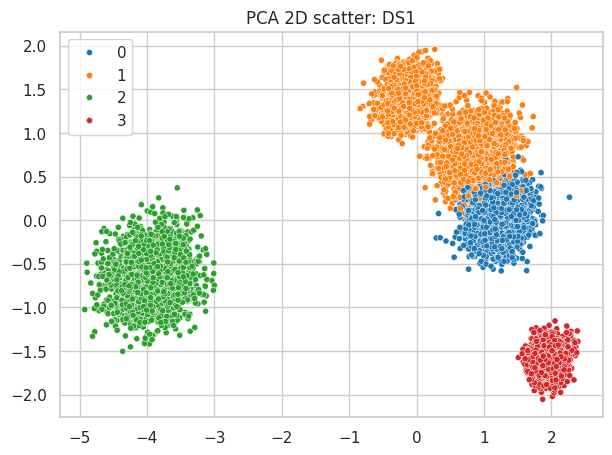

PCA figure saved to artifacts/figures/DS1_pca.png


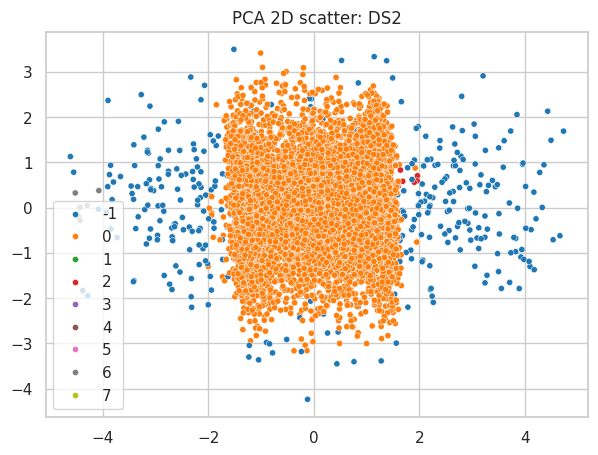

PCA figure saved to artifacts/figures/DS2_pca.png


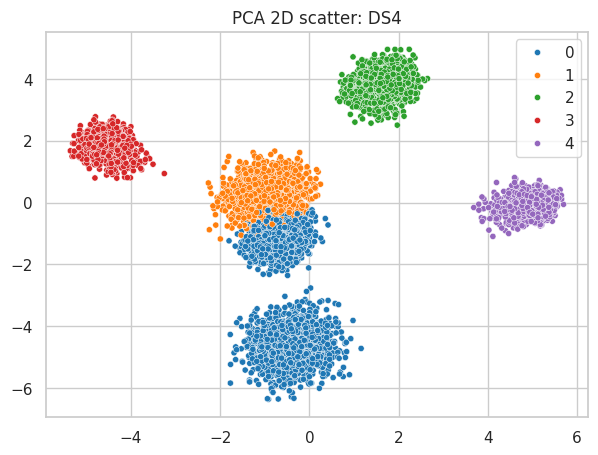

PCA figure saved to artifacts/figures/DS4_pca.png


In [69]:
# ===== 10. Обработка всех датасетов =====
metrics_summary = {}
best_labels = {}
best_configs = {}

# DS1 – KMeans
labels_ds1 = check_kmeans_stability(X_ds_scaled['ds1'], n_clusters=4)
metrics_summary['ds1'] = calc_metrics(X_ds_scaled['ds1'], labels_ds1)
plot_pca(X_ds_scaled['ds1'], labels_ds1, 'DS1')
pd.DataFrame({"sample_id": ids_ds['ds1'], "cluster_label": labels_ds1}).to_csv(
    "artifacts/labels/labels_hw07_ds1.csv", index=False
)
best_configs['ds1'] = {"method":"KMeans","n_clusters":4}

# DS2 – DBSCAN
eps_values = np.linspace(0.1,3,20)
sil_scores_ds2 = run_dbscan_eps_silhouette(X_ds_scaled['ds2'], eps_values)
best_eps_index = np.nanargmax(sil_scores_ds2)
best_eps = eps_values[best_eps_index]
db_ds2 = DBSCAN(eps=best_eps, min_samples=5)
labels_ds2 = db_ds2.fit_predict(X_ds_scaled['ds2'])
metrics_summary['ds2'] = calc_metrics(X_ds_scaled['ds2'], labels_ds2)
plot_pca(X_ds_scaled['ds2'], labels_ds2, 'DS2')
pd.DataFrame({"sample_id": ids_ds['ds2'], "cluster_label": labels_ds2}).to_csv(
    "artifacts/labels/labels_hw07_ds2.csv", index=False
)
best_configs['ds2'] = {"method":"DBSCAN","eps":float(best_eps),"min_samples":5}

# DS4 – Agglomerative
agg_results_ds4 = run_agglomerative(X_ds_scaled['ds4'])
best_linkage, best_k = max(agg_results_ds4, key=agg_results_ds4.get)
ag_ds4 = AgglomerativeClustering(n_clusters=best_k, linkage=best_linkage)
labels_ds4 = ag_ds4.fit_predict(X_ds_scaled['ds4'])
metrics_summary['ds4'] = calc_metrics(X_ds_scaled['ds4'], labels_ds4)
plot_pca(X_ds_scaled['ds4'], labels_ds4, 'DS4')
pd.DataFrame({"sample_id": ids_ds['ds4'], "cluster_label": labels_ds4}).to_csv(
    "artifacts/labels/labels_hw07_ds4.csv", index=False
)
best_configs['ds4'] = {"method":"Agglomerative","linkage":best_linkage,"n_clusters":best_k}

In [61]:
# ===== 11. Сохранение конфигураций и метрик =====
with open("artifacts/best_configs.json","w") as f:
    json.dump(best_configs, f, indent=4)

with open("artifacts/metrics_summary.json","w") as f:
    json.dump(metrics_summary, f, indent=4)

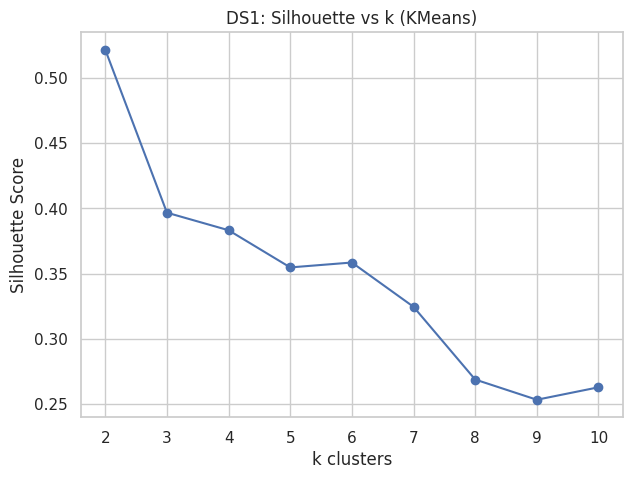

In [62]:
# ===== Графики подбора параметров =====

# --- DS1: KMeans silhouette vs k ---
k_range = range(2, 11)
scores_ds1 = run_kmeans(X_ds_scaled['ds1'], k_range)
k_values, sil_scores = zip(*scores_ds1)

plt.figure(figsize=(7,5))
plt.plot(k_values, sil_scores, marker='o')
plt.xlabel("k clusters")
plt.ylabel("Silhouette Score")
plt.title("DS1: Silhouette vs k (KMeans)")
plt.grid(True)
plt.savefig("artifacts/figures/ds1_silhouette_k.png")
plt.show()

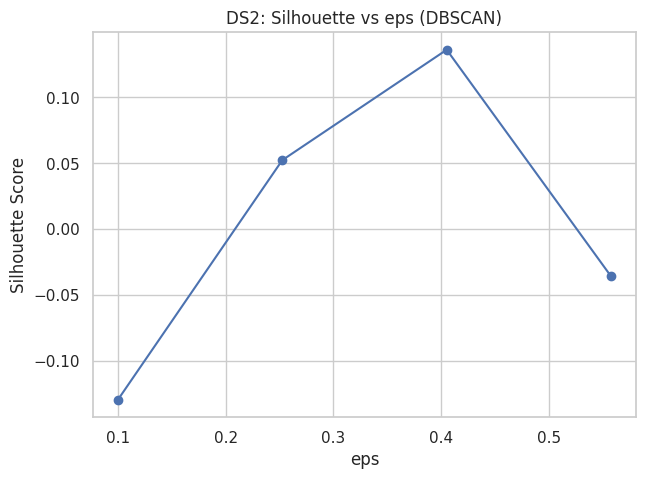

In [63]:
# --- DS2: DBSCAN silhouette vs eps ---
eps_values = np.linspace(0.1, 3, 20)
sil_scores_ds2 = run_dbscan_eps_silhouette(X_ds_scaled['ds2'], eps_values)

plt.figure(figsize=(7,5))
plt.plot(eps_values, sil_scores_ds2, marker='o')
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.title("DS2: Silhouette vs eps (DBSCAN)")
plt.grid(True)
plt.savefig("artifacts/figures/ds2_silhouette_eps.png")
plt.show()

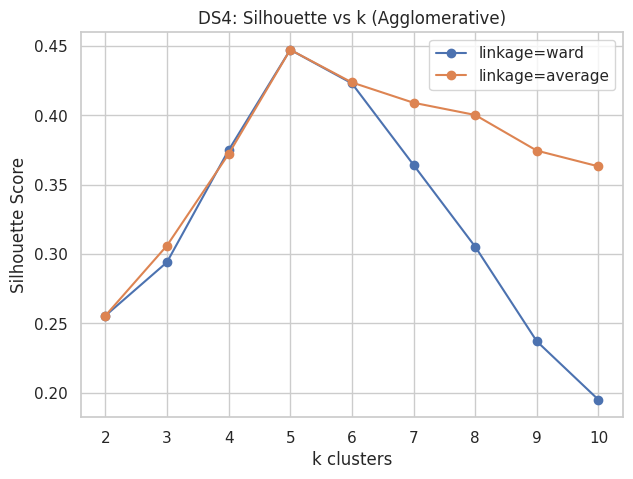

In [64]:
# --- DS4: Agglomerative silhouette vs k (для разных linkage) ---
linkages = ['ward', 'average']
plt.figure(figsize=(7,5))

for linkage in linkages:
    sil_scores = []
    for k in range(2, 11):
        ag = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = ag.fit_predict(X_ds_scaled['ds4'])
        sil = silhouette_score(X_ds_scaled['ds4'], labels)
        sil_scores.append(sil)
    plt.plot(range(2,11), sil_scores, marker='o', label=f'linkage={linkage}')

plt.xlabel("k clusters")
plt.ylabel("Silhouette Score")
plt.title("DS4: Silhouette vs k (Agglomerative)")
plt.legend()
plt.grid(True)
plt.savefig("artifacts/figures/ds4_silhouette_k_linkage.png")
plt.show()